# <center> Statistical Network Analysis Deezer

In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import Counter 
import json
% matplotlib inline


Idées : 

I) Etude de chaque dataset <=> Visualisation

Visualisation par Cluster de musique :
- Plus gros le cercle est et plus de user en choix numéro 1 pour ce style
- Liens entre style : Dans chaque cluster : On étudie pour chaque user le nombre de liens amicaux des styles majoritaires. En itérant sur chaque user on construit une proba empirique de liens d'amitiés entre users. 

Visualisation par users : 
- Mise en place de "supers_users" partageant les deux/trois premiers styles en commun => plus le cercle est gros plus de users sont à l'intérieur
- Edges : liens d'amitié moyen entre super users

Mise en place d'une notion de centralité : 
- degree centrality => Evaluer la répartition en degré dans chaque cluster genre (degré = nombre d'amis)
- 

II) Comparaison des deux Datasets 

- Comparer la distribution en degrés


III) Recommendation (globale ou pas fonction de la partie d'avant)
- (Mettre en place une probabilité d'amitié)
-  Mettre en place une recommandation de style musical (content based recommendation)



In [2]:
path='data/'

In [3]:
data_HR = pd.read_csv(path+"HR_edges.csv",sep=',')
genre_HR = pd.read_csv(path+"HR_genres.csv",sep=",")
genre_HR

,id,genre
0,13357,Pop
1,11542,Indie Rock
2,11543,Dance
3,11540,International Pop
4,11541,Rap/Hip Hop
5,11546,Dance
6,11547,Dance
7,11544,Films/Games
8,11545,Pop
9,11548,Reggae


In [4]:
#get the number of users in each group
size_genre_group_HR =genre_HR.groupby("genre", as_index=False).count()
size_genre_group_HR.sort_values(['id'],ascending=False)

,genre,id
16,Dance,9970
48,Pop,9289
27,Films/Games,5937
33,Indie Rock,4000
51,Rap/Hip Hop,3385
52,Reggae,2820
36,International Pop,2221
17,Dancefloor,2211
32,Indie Pop/Folk,1835
1,Alternative,1612


## Statistiques descriptives

En moyenne, combien de genres aiment un utilisateur?

In [61]:
json_HR = open(path + 'HR_genres.json').read()
json_HR_data = json.loads(json_HR)
json_HR_data

{'13357': ['Pop'],
 '11542': ['Indie Rock',
  'Indie Pop/Folk',
  'International Pop',
  'Rap/Hip Hop',
  'Pop',
  'Rock',
  'Indie Pop',
  'Alternative'],
 '11543': ['Dance', 'Pop', 'Rock'],
 '11540': ['International Pop', 'Jazz', 'Pop'],
 '11541': ['Rap/Hip Hop'],
 '11546': ['Dance',
  'Pop',
  'Techno/House',
  'International Pop',
  'Electro',
  'Singer & Songwriter'],
 '11547': ['Dance', 'Alternative', 'Indie Rock', 'Pop', 'Rock'],
 '11544': ['Films/Games',
  'Dance',
  'Rap/Hip Hop',
  'Contemporary R&B',
  'Pop',
  'International Pop',
  'R&B',
  'Rock',
  'Film Scores'],
 '11545': ['Pop'],
 '11548': ['Reggae', 'Rap/Hip Hop', 'Pop', 'Rock', 'Alternative', 'Folk'],
 '11549': ['Dance', 'Electro', 'Pop'],
 '5988': ['Pop', 'Rock'],
 '5989': ['Dance',
  'Rap/Hip Hop',
  'Pop',
  'Disco',
  'International Pop',
  'Rock',
  'Electro'],
 '19399': ['Folk', 'Pop'],
 '19398': ['Dance', 'Electro', 'Pop', 'Rock'],
 '5982': ['Pop'],
 '5983': ['Indie Pop/Folk', 'Dance', 'Rap/Hip Hop', 'Pop', '

In [ ]:
number_genres_HR = pd.DataFrame(columns=['id', 'liked_genres'])
for k,v in json_HR_data.items():
#     print(k,v)
    number_genres_HR = number_genres_HR.append({'id': k, 'liked_genres': len(v)}, ignore_index=True)

In [71]:
number_genres_HR.head()

,id,liked_genres
0,13357,1
1,11542,8
2,11543,3
3,11540,3
4,11541,1


In [75]:
number_genres_HR['liked_genres'].mean()

6.2973448408553683

In [77]:
number_genres_HR['liked_genres'].min()

1

In [76]:
number_genres_HR['liked_genres'].max()

38

## récupérer tous les genres

In [79]:
all_genres = []
for k,genres in json_HR_data.items():
    for genre in genres:
        if not genre in all_genres:
            all_genres.append(genre)
all_genres

['Pop',
 'Indie Rock',
 'Indie Pop/Folk',
 'International Pop',
 'Rap/Hip Hop',
 'Rock',
 'Indie Pop',
 'Alternative',
 'Dance',
 'Jazz',
 'Techno/House',
 'Electro',
 'Singer & Songwriter',
 'Films/Games',
 'Contemporary R&B',
 'R&B',
 'Film Scores',
 'Reggae',
 'Folk',
 'Disco',
 'Metal',
 'Vocal jazz',
 'Latin Music',
 'Old school soul',
 'Dirty South',
 'Dancefloor',
 'Hard Rock',
 'Kids',
 'Rock & Roll/Rockabilly',
 'Blues',
 'Comedy',
 'Dubstep',
 'Electro Pop/Electro Rock',
 'Jazz Hip Hop',
 'Soul & Funk',
 'Classical',
 'Country',
 'Trance',
 'Indie Rock/Rock pop',
 'East Coast',
 'Soundtracks',
 'Chill Out/Trip-Hop/Lounge',
 'TV Soundtracks',
 'Contemporary Soul',
 'Tropical',
 'Brazilian Music',
 'Dub',
 'Asian Music',
 'Electric Blues',
 'Dancehall/Ragga',
 'Electro Hip Hop',
 'Musicals',
 'Spirituality & Religion',
 'Opera',
 'Ska',
 'Bluegrass',
 'Sports',
 'Instrumental jazz',
 'West Coast',
 'Chicago Blues',
 'Oldschool R&B',
 'Country Blues',
 'African Music',
 'Acousti

In [80]:
len(all_genres)

84

In [81]:
#On crée le dataframe genres_parents
genres_parents = pd.DataFrame(columns=['genre', 'parent'])
for genre in all_genres:
    genres_parents = genres_parents.append({'genre': genre, 'parent': "pop/rock"}, ignore_index=True)

In [83]:
genres_parents.to_csv(path + 'genres_parents.csv',encoding='utf-8')

## Hiérarchiser les genres
On souhaite réduire le nombre de genres pour l'analyse des données. On choisi K groupes.

# Super user 

In [5]:
json_data=open(path+'HR_genres_super_users.json').read()

data = json.loads(json_data)['test']
data

[{'genre': ['Pop'], 'id': '13357'},
 {'genre': ['Indie Rock',
   'Indie Pop/Folk',
   'International Pop',
   'Rap/Hip Hop',
   'Pop',
   'Rock',
   'Indie Pop',
   'Alternative'],
  'id': '11542'},
 {'genre': ['Dance', 'Pop', 'Rock'], 'id': '11543'},
 {'genre': ['International Pop', 'Jazz', 'Pop'], 'id': '11540'},
 {'genre': ['Rap/Hip Hop'], 'id': '11541'},
 {'genre': ['Dance',
   'Pop',
   'Techno/House',
   'International Pop',
   'Electro',
   'Singer & Songwriter'],
  'id': '11546'},
 {'genre': ['Dance', 'Alternative', 'Indie Rock', 'Pop', 'Rock'],
  'id': '11547'},
 {'genre': ['Films/Games',
   'Dance',
   'Rap/Hip Hop',
   'Contemporary R&B',
   'Pop',
   'International Pop',
   'R&B',
   'Rock',
   'Film Scores'],
  'id': '11544'},
 {'genre': ['Pop'], 'id': '11545'},
 {'genre': ['Reggae', 'Rap/Hip Hop', 'Pop', 'Rock', 'Alternative', 'Folk'],
  'id': '11548'},
 {'genre': ['Dance', 'Electro', 'Pop'], 'id': '11549'},
 {'genre': ['Pop', 'Rock'], 'id': '5988'},
 {'genre': ['Dance',


In [6]:
new_data = []
length = 3

# On travaille les données pour ne récuperer que les 'length' premiers genres de chaque user
for user in data:
    if len(user['genre'])<length :
        while len(user['genre'])<length:
            user['genre'].append('')
    elif len(user['genre'])>length:
        user['genre'] = user['genre'][:length]
        
    new_data.append(user)
new_data

[{'genre': ['Pop', '', ''], 'id': '13357'},
 {'genre': ['Indie Rock', 'Indie Pop/Folk', 'International Pop'],
  'id': '11542'},
 {'genre': ['Dance', 'Pop', 'Rock'], 'id': '11543'},
 {'genre': ['International Pop', 'Jazz', 'Pop'], 'id': '11540'},
 {'genre': ['Rap/Hip Hop', '', ''], 'id': '11541'},
 {'genre': ['Dance', 'Pop', 'Techno/House'], 'id': '11546'},
 {'genre': ['Dance', 'Alternative', 'Indie Rock'], 'id': '11547'},
 {'genre': ['Films/Games', 'Dance', 'Rap/Hip Hop'], 'id': '11544'},
 {'genre': ['Pop', '', ''], 'id': '11545'},
 {'genre': ['Reggae', 'Rap/Hip Hop', 'Pop'], 'id': '11548'},
 {'genre': ['Dance', 'Electro', 'Pop'], 'id': '11549'},
 {'genre': ['Pop', 'Rock', ''], 'id': '5988'},
 {'genre': ['Dance', 'Rap/Hip Hop', 'Pop'], 'id': '5989'},
 {'genre': ['Folk', 'Pop', ''], 'id': '19399'},
 {'genre': ['Dance', 'Electro', 'Pop'], 'id': '19398'},
 {'genre': ['Pop', '', ''], 'id': '5982'},
 {'genre': ['Indie Pop/Folk', 'Dance', 'Rap/Hip Hop'], 'id': '5983'},
 {'genre': ['Metal', '

In [7]:
len(new_data)

54573

In [12]:
def get_super_user_by_genres(super_users, genres):
    if(len(super_users)>0):
        for super_user in super_users:
            same_genres = compare(super_user['genres'], genres)
            if same_genres:
                return super_user
    return None

def compare(s, t):
    return Counter(s) == Counter(t)
    
super_users = []
i=0
for user in new_data:
    super_user = get_super_user_by_genres(super_users, user['genre'])
    if not super_user:
        super_users.append({
            'id_super_user': i,
            'genres': user['genre'],
            'ids': [user['id']]
        })
        i += 1
    else :
        super_user['ids'].append(user['id'])
super_users

[{'genres': ['Pop', '', ''],
  'id_super_user': 0,
  'ids': ['13357',
   '11545',
   '5982',
   '24853',
   '46131',
   '270',
   '276',
   '16703',
   '12014',
   '12011',
   '17259',
   '45445',
   '19395',
   '20150',
   '44791',
   '22746',
   '13052',
   '54170',
   '54175',
   '54177',
   '20251',
   '20257',
   '40967',
   '40965',
   '44421',
   '1171',
   '23507',
   '27617',
   '8544',
   '50417',
   '629',
   '22678',
   '22672',
   '26567',
   '26561',
   '8295',
   '8296',
   '392',
   '397',
   '32226',
   '3744',
   '3743',
   '52103',
   '52100',
   '19973',
   '16709',
   '16708',
   '6815',
   '9754',
   '33750',
   '30334',
   '30335',
   '30331',
   '7566',
   '7561',
   '35218',
   '35214',
   '35215',
   '23269',
   '10255',
   '43850',
   '43856',
   '43855',
   '10705',
   '6775',
   '6771',
   '46797',
   '46796',
   '49564',
   '42814',
   '38562',
   '18894',
   '18898',
   '44225',
   '44228',
   '36173',
   '18769',
   '33526',
   '8036',
   '44913',
   '44

In [8]:
len(super_users)

2330

On enregistre les résultats dans un fichier json

In [14]:
with open(path+'super_user_HR.json', 'w') as f:
    f.write(json.dumps(super_users, indent=4))


On récupère les résultats du fichier json

In [8]:
with open(path+'super_user_HR.json', 'r') as f:
    super_users = json.load(f)
super_users

[{'genres': ['Pop', '', ''],
  'id_super_user': 0,
  'ids': ['13357',
   '11545',
   '5982',
   '24853',
   '46131',
   '270',
   '276',
   '16703',
   '12014',
   '12011',
   '17259',
   '45445',
   '19395',
   '20150',
   '44791',
   '22746',
   '13052',
   '54170',
   '54175',
   '54177',
   '20251',
   '20257',
   '40967',
   '40965',
   '44421',
   '1171',
   '23507',
   '27617',
   '8544',
   '50417',
   '629',
   '22678',
   '22672',
   '26567',
   '26561',
   '8295',
   '8296',
   '392',
   '397',
   '32226',
   '3744',
   '3743',
   '52103',
   '52100',
   '19973',
   '16709',
   '16708',
   '6815',
   '9754',
   '33750',
   '30334',
   '30335',
   '30331',
   '7566',
   '7561',
   '35218',
   '35214',
   '35215',
   '23269',
   '10255',
   '43850',
   '43856',
   '43855',
   '10705',
   '6775',
   '6771',
   '46797',
   '46796',
   '49564',
   '42814',
   '38562',
   '18894',
   '18898',
   '44225',
   '44228',
   '36173',
   '18769',
   '33526',
   '8036',
   '44913',
   '44

In [9]:
super_users[-1]

{'genres': ['Jazz Hip Hop', 'Indie Pop/Folk', 'Dance'],
 'id_super_user': 2329,
 'ids': ['37497']}

In [10]:
list_id_users = data_HR['node_1'].unique()

In [11]:
test = data_HR.groupby('node_1')['node_2'].apply(list)
type(test)

pandas.core.series.Series

In [12]:
test

node_1
0        [4076, 29861, 53717, 23820, 39945, 22224, 1733...
1        [8670, 21767, 41815, 49744, 10065, 46613, 2037...
2                             [42452, 27264, 43274, 24848]
3        [50166, 47979, 34959, 17210, 22144, 1858, 4556...
4        [40648, 8671, 34449, 8991, 43353, 44829, 24133...
5                                     [5258, 19964, 17304]
6        [12431, 1900, 12944, 6654, 23855, 22317, 24621...
7        [50470, 7232, 19057, 11726, 7527, 29543, 21850...
8                [48199, 11420, 14768, 7090, 40002, 46603]
9        [53252, 32785, 12847, 45435, 34525, 58, 6104, ...
10       [42088, 40170, 3537, 54274, 2160, 7289, 23138,...
11       [12611, 16288, 10526, 14147, 24970, 21789, 217...
12                            [51158, 42829, 27771, 48855]
13                                                 [20709]
14       [50055, 21325, 43845, 12656, 16317, 47011, 459...
15                                          [52246, 41271]
16       [14359, 50275, 12603, 28100, 40813, 1807

In [13]:
len(test)

47987

In [14]:
#create super users adjacency matrix
super_users_adj = np.zeros((len(super_users),len(super_users)))

In [15]:
def find_super_user(super_users, id_user):
    for super_user in super_users:
        for user_id in super_user['ids']:
            if int(user_id) == int(id_user):
                return super_user['id_super_user']
    print("None find : super_users", super_users, "; id_user", id_user)
    return None

for i in range(len(test)):
    id_user = list_id_users[i]
    super_user_row = find_super_user(super_users, id_user)
    for id_friend in test[id_user]:
        super_friend_column = find_super_user(super_users, id_friend)
        #print('id_user', id_user,
        #      'id_friend', id_friend,
        #      'super_user_row', super_user_row,
        #      'super_friend_column', super_friend_column)
        super_users_adj[super_user_row, super_friend_column] += 1

In [16]:
super_users_adj

array([[  7.44800000e+03,   3.84000000e+02,   2.84000000e+02, ...,
          3.00000000e+00,   3.00000000e+00,   1.00000000e+00],
       [  4.01000000e+02,   2.60000000e+01,   1.40000000e+01, ...,
          0.00000000e+00,   2.00000000e+00,   0.00000000e+00],
       [  3.31000000e+02,   1.70000000e+01,   1.40000000e+01, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  2.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  2.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [17]:
np.max(super_users_adj)

7448.0

In [18]:
np.min(super_users_adj)

0.0

In [19]:
np.mean(super_users_adj)

0.091768498222476014

In [20]:
super_users_adj[super_user_row, super_friend_column]

28.0

In [21]:
super_users_adj.tofile('super_users_adj.file')

In [23]:
!ls -lt ./data

total 72168
-rw-rw-r-- 1 ubuntu ubuntu 43431200 May  5 17:26 super_users_adj.file
-rw-rw-r-- 1 ubuntu ubuntu  1542059 May  5 17:26 super_user_HR.json
-rw-rw-r-- 1 ubuntu ubuntu     1367 May  5 17:26 dataset_descriptions.txt
-rw-rw-r-- 1 ubuntu ubuntu  3615864 May  5 17:26 RO_genres.json
-rw-rw-r-- 1 ubuntu ubuntu  1443116 May  5 17:26 RO_edges.csv
-rw-rw-r-- 1 ubuntu ubuntu  4053774 May  5 17:26 HU_genres.json
-rw-rw-r-- 1 ubuntu ubuntu  2565945 May  5 17:26 HU_edges.csv
-rw-rw-r-- 1 ubuntu ubuntu  5765199 May  5 17:26 HR_genres_super_users.json
-rw-rw-r-- 1 ubuntu ubuntu  4892019 May  5 17:26 HR_genres.json
-rw-rw-r-- 1 ubuntu ubuntu   798296 May  5 17:26 HR_genres.csv
-rw-rw-r-- 1 ubuntu ubuntu  5769739 May  5 17:26 HR_edges.csv


We create the graph

In [ ]:
nodes_list = []
nodes_size = []
edges_list = []
edges_size = []
nodes_labels = []

for i in range(len(super_users)):
    nodes_list.append(i)
    nodes_size.append(len(super_users[i]['ids']))
    nodes_labels.append(', '.join(super_users[i]['genres']))
    for j in range(len(super_users)):
        if super_users_adj[i,j] > 0:
            edges_list.append((i,j))
            edges_size.append(super_users_adj[i,j]/np.max(super_users_adj))

In [52]:
nodes_size_normalized = (nodes_size / np.max(nodes_size))*100

In [59]:
print( np.min(nodes_size_normalized) )

0.0145602795574


In [33]:
nodes_labels_dict = {}

for i in range(len(super_users)):
    nodes_labels_dict[i] = nodes_labels[i]

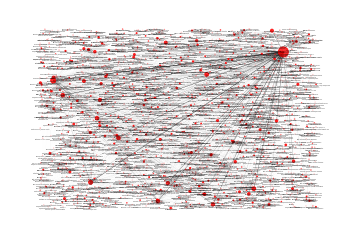

In [57]:
G=nx.Graph()
G.add_nodes_from(nodes_list)
G.add_edges_from(edges_list)
# nodes_position = nx.fruchterman_reingold_layout(G) 
# nodes_position = nx.spring_layout(G) 
nodes_position = nx.random_layout(G) 

nx.draw_networkx_nodes(G,
                       nodes_position,
                       nodelist = nodes_list,
                       node_color = ['red'],
#                        node_size = nodes_size,
                       node_size = nodes_size_normalized,
                       alpha=0.8)

nx.draw_networkx_edges(G,
                       nodes_position,
                       edges_list,
                       width= edges_size)

nx.draw_networkx_labels(G,
                        nodes_position,
                        font_size=1,
                        labels = nodes_labels_dict)
                       
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.savefig(path + "super_users.png", dpi=1000, bbox_inches='tight')
plt.show()

In [58]:
print("test")

test
